In [9]:
from retro_branching.utils import PlotAesthetics

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Want to make a claim about RL being faster than SL in training time as we scale to larger problems.

# Enter Data

Measuring time it takes to generate, label, and save 1,000 samples for each graph size using the explore then strong branch strategy of Gasse et al. on 20 Intel Xeon ES-2660 CPUs running in parallel (on barcelona)

In [2]:
# # PARALLEL CPUS
# # num CPUs being used to generate labelled data in parallel
# num_parallel_cpus = 20

# # mean time to generate a labelled sample with parallel processing using num_parallel_cpus
# size_to_per_sample_label_time = {'100x100': 0.2,
#                                  '200x200': 0.235,
#                                  '400x400': 1.0,
#                                  '800x800': 2.1,
#                                  '1600x1600': 6.34}

# # mean time to solve num_parallel_cpus instances in parallel
# size_to_per_parallel_loop_time = {'100x100': 0.1, 
#                                  '200x200': 1.1,
#                                  '400x400': 35,
#                                  '800x800': 515,
#                                  '1600x1600': 3600}



# SINGLE CPU
num_parallel_cpus = 1
size_to_per_sample_label_time = {'100x100': 0.503, # 0.833
                                 '200x200': 0.833, # 0.503
                                 '400x400': 1.88,
                                 '800x800': 8.78,
                                 '1600x1600': 26.9} # 15.6-26.9

# mean time to solve num_parallel_cpus instances in parallel
size_to_per_parallel_loop_time = {'100x100': 0.044, 
                                 '200x200': 0.218,
                                 '400x400': 4.43,
                                 '800x800': 132.7,
                                 '1600x1600': 1694} # 218-1694

# Create Plot

### Plot Config

In [6]:
time_units = 'days' # 'secs' 'mins' 'hours' 'days'

context = 'paper'
style = 'whitegrid'
font_scale = 2
palette = 'hls'
fig_size = (7.5, 5)
linewidth = 2.5

yaxis_label_style = 'plain' # 'sci' 'plain'

sns.set_theme(font_scale=font_scale,
              context=context,
              style=style,
              palette=palette)

time_units_to_factor = {'secs': 1, 'mins': 60, 'hours': 60*60, 'days': (60*60*24)}

### Collect Data

In [7]:
# num training samples needed to train supervised agent
num_samples = 125000

# instance_sizes = [int(size.split('x')[0])+int(size.split('x')[1]) for size in size_to_per_sample_label_time.keys()]
instance_size_labels = [size for size in size_to_per_sample_label_time.keys()]
# print(instance_sizes)
print(instance_size_labels)

generation_times = [(label_time*num_samples)/time_units_to_factor[time_units] for label_time in size_to_per_sample_label_time.values()]
print(generation_times)

['100x100', '200x200', '400x400', '800x800', '1600x1600']
[0.7277199074074074, 1.205150462962963, 2.7199074074074074, 12.702546296296296, 38.917824074074076]


### Plot

In [15]:
scaling_factor = 1
width_scaling_factor = 1
height_scaling_factor = 1

aesthetics = PlotAesthetics()
aesthetics.set_icml_paper_plot_aesthetics()

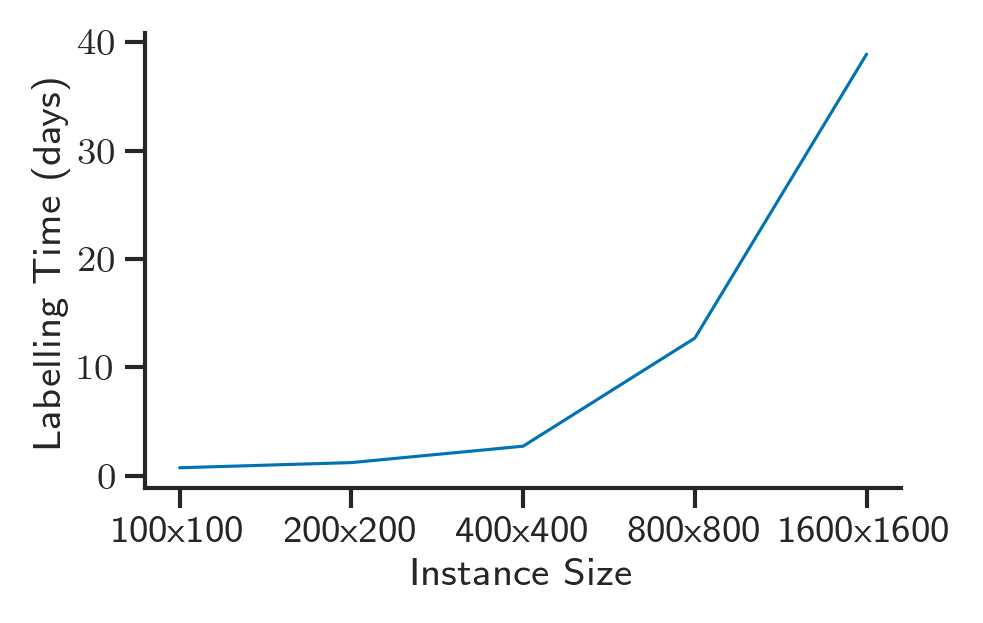

In [16]:
df = pd.DataFrame({'instance_sizes': instance_size_labels, 'generation_times': generation_times})

f, ax = plt.subplots(figsize=aesthetics.get_standard_fig_size(scaling_factor=scaling_factor, width_scaling_factor=width_scaling_factor, height_scaling_factor=height_scaling_factor))
g = sns.lineplot(data=df, x='instance_sizes', y='generation_times', linewidth=aesthetics.linewidth)
g.set_xlabel('Instance Size')
g.set_ylabel(f'Labelling Time ({time_units})')
ax.tick_params(axis='both', which='major', pad=2)
ax.xaxis.labelpad = 2
ax.yaxis.labelpad = 2
sns.despine(ax=ax) # remove top and right spines
plt.ticklabel_format(style=yaxis_label_style, axis='y', scilimits=(0,0))
plt.gcf().patch.set_alpha(0.0)
plt.show()